In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import datasets - https://www.kaggle.com/datasets/savvastj/nfl-combine-data?resource=download (nfl combine data from kaggle | 2000-2018)
# import datasets - https://www.kaggle.com/datasets/jameslko/nfl-rushing-data?resource=download (nfl rushing data from kaggle | 2001-2023)

combine_data = pd.read_csv('/Users/akhilrepaka/Desktop/Sports Analytics RB Project/combine_data.csv')
career_data =  pd.read_csv('/Users/akhilrepaka/Desktop/Sports Analytics RB Project/rushing_cleaned.csv')

combine_data.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,AbraJo00,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,AlexSh00,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,0.0,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,AndeRa21,6.0,Carolina Panthers,1.0,23.0


In [95]:
# data cleaning and merging

updated = career_data.groupby('Player').agg({
    'G' : 'sum',
    'GS' : 'sum',
    'rYds' : 'sum',
    'rAtt': 'sum',
    'rTD': 'sum',
    'r1D' : 'sum',
    'rLng' : 'max',
    'Fmb' : 'sum',
})


# creating starting year, ending year, and total years played in the NFL columns
year_update = career_data.groupby('Player')["Year"].agg(
    year_started = 'min', total_years = lambda x: x.max() - x.min(), year_ended = 'max'
)

# merge the updated year totals with the career data
merged_career_data = pd.merge(updated, year_update, on = "Player")

# calculating additional statistics | accounts for averages and per game stats
merged_career_data['Y/A'] = (merged_career_data['rYds'] / merged_career_data['rAtt']).round(2)
merged_career_data['Y/G'] = (merged_career_data['rYds'] / merged_career_data['G']).round(2)

# merging combine data with career data and filtering for only rbs
final_merge = pd.merge(combine_data,merged_career_data, on = "Player", how = "inner")
rbs = final_merge[final_merge["Pos"] == 'RB']

# filtering for only players who participated in the combine after 2001 
# I only have data from 2001 onwards for rushing stats
rbs = rbs[rbs['Year'] > 2001]
rbs.rename(columns={'Year': 'combine_year'}, inplace=True)
rbs = rbs.set_index('Player')

# creating a new column to indicate if the player's career is completed as of 2022 
# | accounting for people still in the league
rbs['career_completed'] = rbs['year_ended'] <= 2022

rbs.head(10)


,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,combine_year,...,rTD,r1D,rLng,Fmb,year_started,total_years,year_ended,Y/A,Y/G,career_completed
Player,,,,,,,,,,,,,,,,,,,,,
Damien Anderson,RB,70,211,4.56,33.5,27.0,112.0,6.93,4.02,2002,...,0,8,17,0,2002,3,2005,3.16,4.06,True
Ladell Betts,RB,70,220,4.62,38.0,23.0,116.0,7.06,4.06,2002,...,15,175,27,14,2002,8,2010,4.05,29.96,True
Joe Burns,RB,69,213,4.81,31.0,21.0,105.0,NaN,NaN,2002,...,0,5,21,1,2002,2,2004,3.02,4.60,True
Rock Cartwright,RB,68,237,4.47,35.0,30.0,116.0,7.18,4.25,2002,...,6,63,52,5,2002,9,2011,4.19,6.21,True
T.J. Duckett,RB,72,254,4.45,NaN,NaN,NaN,NaN,NaN,2002,...,44,175,55,9,2002,6,2008,3.92,30.26,True
Tony Fisher,RB,73,226,4.66,41.5,21.0,126.0,7.00,4.13,2002,...,4,49,28,5,2002,4,2006,3.69,13.07,True
DeShaun Foster,RB,73,222,4.57,35.5,20.0,119.0,6.82,4.16,2002,...,11,179,71,18,2003,5,2008,3.85,45.19,True
Lamar Gordon,RB,73,214,4.55,34.0,16.0,119.0,NaN,NaN,2002,...,3,49,29,9,2002,4,2006,3.42,18.88,True
William Green,RB,72,221,4.60,42.0,27.0,121.0,NaN,NaN,2002,...,9,102,64,12,2002,3,2005,3.71,45.85,True


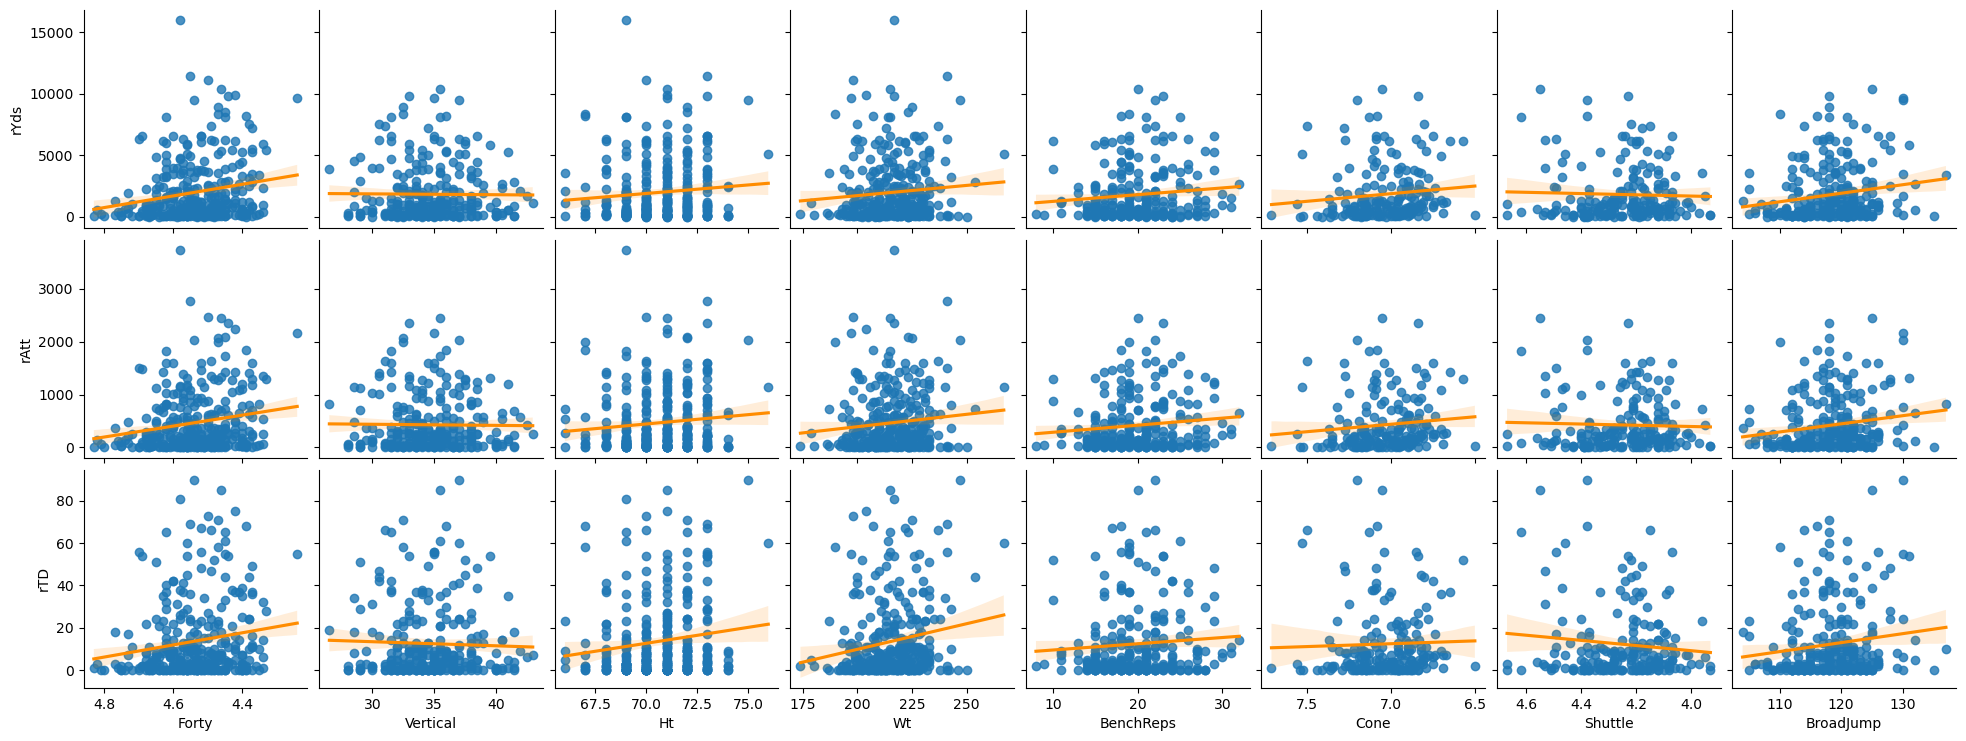

{'rYds & Forty': 0.1929429767352707,
 'rYds & Vertical': -0.00945507384705091,
 'rYds & Ht': 0.09460547779170306,
 'rYds & Wt': 0.08710527708991865,
 'rYds & BenchReps': 0.10974856450238983,
 'rYds & Cone': 0.11228818439851597,
 'rYds & Shuttle': 0.034459203406588486,
 'rYds & BroadJump': 0.17373555009373473,
 'rAtt & Forty': 0.1831568655065929,
 'rAtt & Vertical': -0.012462127131582457,
 'rAtt & Ht': 0.10471732872639963,
 'rAtt & Wt': 0.10689769573051014,
 'rAtt & BenchReps': 0.11707671493300097,
 'rAtt & Cone': 0.11276401924197502,
 'rAtt & Shuttle': 0.03475351317770387,
 'rAtt & BroadJump': 0.16892627060687504,
 'rTD & Forty': 0.15840224009822115,
 'rTD & Vertical': -0.03421447521422675,
 'rTD & Ht': 0.13944604567130392,
 'rTD & Wt': 0.17232947580346777,
 'rTD & BenchReps': 0.07401731073088379,
 'rTD & Cone': 0.03155916453173058,
 'rTD & Shuttle': 0.10647092011981676,
 'rTD & BroadJump': 0.13821311687849994}

In [93]:
# visualization
y_vars = ['rYds', 'rAtt', 'rTD']
x_vars = ['Forty', 'Vertical', 'Ht', 'Wt', 'BenchReps', 'Cone', 'Shuttle', 'BroadJump']

g = sns.pairplot(
    data = rbs,
    x_vars = x_vars,
    y_vars = y_vars,
    kind = 'reg',
    plot_kws={'line_kws': {'color': 'darkorange'}}
)

# inverting x-axis of plots with seconds as unit of measurement
for ax in g.axes.flatten():
    if ax.get_xlabel() in ['Forty', 'Cone', 'Shuttle']:
        ax.invert_xaxis()

plt.show()

# computing the correlation coefficients for each graph 
cor_dict = {}
for i in y_vars:
    for j in x_vars:
        corr = rbs[i].corr(rbs[j])
        if j in ['Forty', 'Cone', 'Shuttle']:
            corr = abs(corr)
        cor_dict[f'{i} & {j}'] = corr

cor_dict

In [96]:
# creating normalized indexes
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rbs_scaled = rbs.copy()

#### agility index adjusted for size ####

# invert times so that higher = better
rbs_scaled['Cone'] = 1/rbs_scaled['Cone']
rbs_scaled['Shuttle'] = 1/rbs_scaled['Shuttle']


# gave more weight to shuttle than cone off of the simple correlation analysis (tentative)
rbs_scaled['AgilityIndex'] = (0.35 * rbs_scaled['Cone'] + 0.65 * rbs_scaled['Shuttle']) / (2 * rbs_scaled['Wt'])
# normalizing the agility index
rbs_scaled['AgilityIndex'] = scaler.fit_transform(rbs_scaled[['AgilityIndex']])
rbs['AgilityIndex'] = rbs_scaled['AgilityIndex']

#### explosiveness index ####

# invert 40 times so that higher = better
rbs_scaled['Forty_inv'] = 1/rbs_scaled['Forty']

# normalize the four columns
cols = ['Forty_inv', 'Vertical', 'BroadJump', 'BenchReps']
rbs_scaled[cols] = scaler.fit_transform(rbs_scaled[cols])

# compute Explosiveness Index | weight were estimated looking at the correlation coefficients
rbs_scaled['ExplosiveIndex'] = (
    0.35 * rbs_scaled['Forty_inv'] + 
    0.20 * rbs_scaled['BenchReps'] + 
    0.35 * rbs_scaled['BroadJump'] + 
    0.10 * rbs_scaled['Vertical']
)

rbs['ExplosiveIndex'] = rbs_scaled['ExplosiveIndex']

#### success index #### 
# making one outcome variable to determine success of a running back's career

rbs[['rYds_norm', 'rTd_norm', 'Y/A_norm', 'total_years_norm']] = scaler.fit_transform(rbs[['rYds', 'rTD', 'Y/A', 'total_years' ]])
rbs['SuccessIndex'] = (
    0.15 * rbs['rYds_norm'] + 
    0.30 * rbs['rTd_norm'] + 
    0.40 * rbs['Y/A_norm'] + 
    0.15 * rbs['total_years_norm']
)

rbs


,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,combine_year,...,Y/A,Y/G,career_completed,AgilityIndex,ExplosiveIndex,rYds_norm,rTd_norm,Y/A_norm,total_years_norm,SuccessIndex
Player,,,,,,,,,,,,,,,,,,,,,
Damien Anderson,RB,70,211,4.56,33.5,27.0,112.0,6.93,4.02,2002,...,3.16,4.06,True,0.573695,0.434536,0.008999,0.000000,0.396070,0.200000,0.189778
Ladell Betts,RB,70,220,4.62,38.0,23.0,116.0,7.06,4.06,2002,...,4.05,29.96,True,0.468070,0.436299,0.207974,0.166667,0.488108,0.533333,0.356439
Joe Burns,RB,69,213,4.81,31.0,21.0,105.0,NaN,NaN,2002,...,3.02,4.60,True,NaN,0.156671,0.012186,0.000000,0.381593,0.133333,0.174465
Rock Cartwright,RB,68,237,4.47,35.0,30.0,116.0,7.18,4.25,2002,...,4.19,6.21,True,0.263164,0.564692,0.059868,0.066667,0.502585,0.600000,0.320014
T.J. Duckett,RB,72,254,4.45,NaN,NaN,NaN,NaN,NaN,2002,...,3.92,30.26,True,NaN,NaN,0.175978,0.488889,0.474664,0.400000,0.422929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Roc Thomas,RB,70,198,4.56,35.5,16.0,125.0,NaN,NaN,2018,...,3.75,6.00,True,NaN,0.492869,0.002000,0.000000,0.457084,0.000000,0.183133
Mark Walton,RB,70,202,4.60,31.5,18.0,118.0,NaN,NaN,2018,...,3.51,11.19,True,NaN,0.387884,0.014811,0.000000,0.432265,0.066667,0.185127
Jordan Wilkins,RB,73,216,NaN,36.0,16.0,117.0,NaN,4.27,2018,...,4.85,20.59,True,NaN,NaN,0.063180,0.044444,0.570838,0.266667,0.291145


Mean Squared Error: 0.8776578093766014
R² Score: -0.07184341648926651


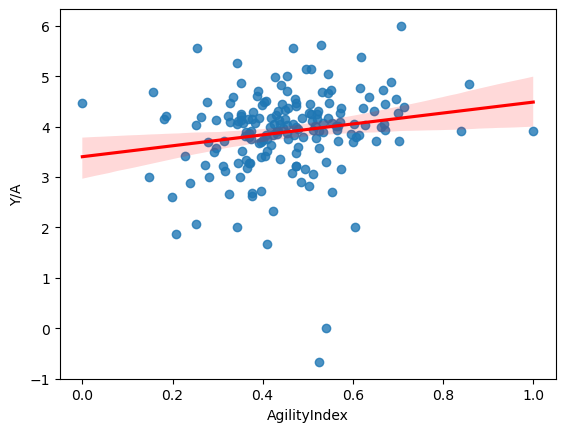

In [70]:
# linear regression model for agility index vs Y/A
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# cleaning data
rbs_clean_a = rbs.dropna(subset = ['AgilityIndex'])

# setting variables
X = rbs_clean_a[['AgilityIndex']]
y = rbs_clean_a[['Y/A']]

# training and fitting model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

# testing model
y_pred = model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

#visualization
sns.regplot(x = "AgilityIndex", y = 'Y/A', data = rbs_clean_a, line_kws={'color': 'red'})

plt.show()

Mean Squared Error: 555.6709347335901
R² Score: 0.0089204166789979


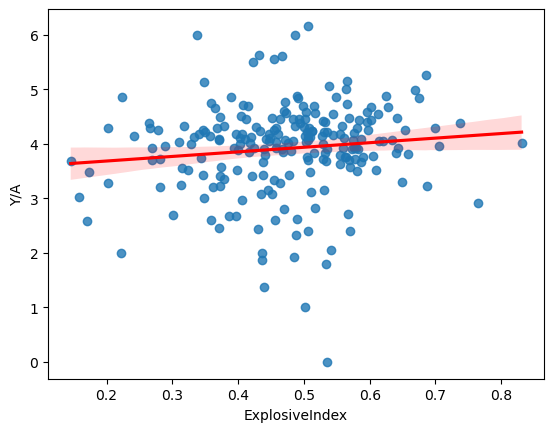

In [71]:
# linear regression model for explosiveness index vs Y/A

# cleaning data
rbs_clean_e = rbs.dropna(subset = 'ExplosiveIndex')

# setting variables
X = rbs_clean_e[['ExplosiveIndex']]
y = rbs_clean_e[['Y/G']]

# splitting data and fitting model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

# testing model
y_pred = model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# visualization
sns.regplot(x = "ExplosiveIndex", y = 'Y/A', data = rbs_clean_e, line_kws={'color': 'red'})
plt.show()

r^2: -0.2120966279300167, MSE: 0.018517280381771445


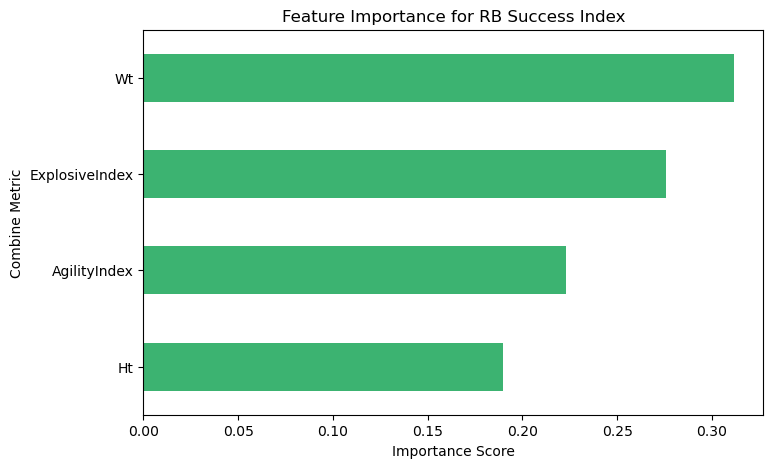

In [72]:
# random forest model to figure out which features are most important in predictiing Success Index
# also linear regression does not seem to capture the pattern well

from sklearn.ensemble import RandomForestRegressor

# setting up the model | cleaning data | setting variables
features = [
    'Ht', 'Wt', 'AgilityIndex', 'ExplosiveIndex'
]
rbs_cleaned_s = rbs.dropna(subset=features + ['SuccessIndex'])
X = rbs[features]
y = rbs['SuccessIndex']

# split data and fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = RandomForestRegressor(n_estimators = 300, max_depth = 10, random_state = 42)
model.fit(X_train, y_train)

# testing model
y_pred = model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"r^2: {r2}, MSE: {mse}")

# visualize it
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values()

plt.figure(figsize=(8,5))
importance.plot(kind='barh', color='mediumseagreen')
plt.title("Feature Importance for RB Success Index")
plt.xlabel("Importance Score")
plt.ylabel("Combine Metric")
plt.show()

In [97]:
# comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(comparison.head(10))
# print(X.corrwith(y))

In [ ]:
# statistical significance using statsmodels

import statsmodels.api as sm

# get rid of NaN values to align indexes
dropped = rbs[['Forty', 'Cone', 'Shuttle','Vertical', 'BroadJump', 'Ht', 'Wt', 'BenchReps', 'AgilityIndex', 'ExplosiveIndex']].dropna()
dropped = pd.merge(dropped, rbs[['SuccessIndex']], 
                   left_index=True, right_index=True, how='inner')


X = dropped[['Forty', 'Cone', 'Shuttle','Vertical', 'BroadJump', 'Ht', 'Wt', 'BenchReps', 'AgilityIndex', 'ExplosiveIndex']]

# adding constant term for intercept
X_const = sm.add_constant(X)

y = dropped['SuccessIndex']

# fitting the model
model = sm.OLS(y, X_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           SuccessIndex   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.462
Date:                Mon, 20 Oct 2025   Prob (F-statistic):             0.0123
Time:                        23:07:49   Log-Likelihood:                 118.79
No. Observations:                 152   AIC:                            -217.6
Df Residuals:                     142   BIC:                            -187.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.0982      1.023     -1.

Research Question:
Which NFL Scouting Combine metrics are the most predictive indicators of long-term success for running backs in the NFL?

Motivation:
Every year teams invest heavily into scouting and drafting running backs based on metrics collected during the NFL Combine in combination with college statistics. These combined statistics include 40-yard dash times, bench press reps, vertical jump, shuttle drills, etc. However the predictive nature of these statistics remains a hot debate in the scouting community. Some analysts argue the 40 yard dash is an overvalued statistic in the modern NFL, while other statistics such as strength and agility have become more important indicators of success. By looking at past NFL careers and those players’ combine statistics we could potentially find an indicator that stands out amongst the metrics collected at the NFL combine. This project aims to uncover which physical attributes most strongly correlate with sustained success, helping scouts and teams make more informed decisions.

Objective:
We aim to answer two primary questions through this project. First, whether the NFL Combine is a good predictor of career success at all for running backs, and second, which metrics stand out in terms of predicting the success of running back careers. By providing data driven answers to this question, scouts and analysts can use our results across many different future draft classes for running backs. 

Data Sources:

https://www.kaggle.com/datasets/savvastj/nfl-combine-data?resource=download | nfl combine data (2000 - 2018)
https://www.kaggle.com/datasets/jameslko/nfl-rushing-data?resource=download | nfl rushing data (2001 - 2023)

Description of Current Analysis:
This analysis explores how NFL Combine metrics relate to running back success, measured using a composite SuccessIndex derived from key rushing statistics (total rushing yards, total rushing touchdowns, average yards per attempt, total years played in NFL). Using both linear and random forest regression models, the goal was to identify which physical and performance attributes most strongly predict long-term productivity. 

Current Notes (10/21):
- The models show that combine metrics do have some predictive value for RB success (a little modest, still testing for importance)
- Random Forest models perform slightly better than linear regression (higher R^2, lower MSE) suggesting that non-linear relationships and feature interactions (e.g speed × power) are important
- Shuttle, Weight, and possibly Broad Jump — metrics tied to agility and explosiveness - are looking to be the most important metrics in predicting rb success 

Room for Improvement:
- Low R^2 values indicate the current features (BY THEMSELVES) explain only a small portion of player success; need to add interaction terms
- Multicollinearity among combine metrics may distort feature significance (add in a VIF to detect it)
- Some of the added features (the agility/explosiveness indices) need refinement or normalization to capture true performance dynamics.
- Try tuning the hyperparameters more or other ensemble learning models like XGBoosting or Gradient Boosting



